In [0]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

Cloning into 'SRCNN-Keras'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (58/58), done.


In [0]:
!ls

sample_data  SRCNN-Keras


In [0]:
cd SRCNN-Keras

/content/SRCNN-Keras


In [0]:
!unzip yang91.zip

Archive:  yang91.zip
   creating: yang91/
  inflating: yang91/tt9.bmp          
  inflating: yang91/tt8.bmp          
  inflating: yang91/tt7.bmp          
  inflating: yang91/tt6.bmp          
  inflating: yang91/tt5.bmp          
  inflating: yang91/tt4.bmp          
  inflating: yang91/tt3.bmp          
  inflating: yang91/tt27.bmp         
  inflating: yang91/tt26.bmp         
  inflating: yang91/tt25.bmp         
  inflating: yang91/tt24.bmp         
  inflating: yang91/tt23.bmp         
  inflating: yang91/tt22.bmp         
  inflating: yang91/tt21.bmp         
  inflating: yang91/tt20.bmp         
  inflating: yang91/tt2.bmp          
  inflating: yang91/tt19.bmp         
  inflating: yang91/tt18.bmp         
  inflating: yang91/tt17.bmp         
  inflating: yang91/tt16.bmp         
  inflating: yang91/tt15.bmp         
  inflating: yang91/tt14.bmp         
  inflating: yang91/tt13.bmp         
  inflating: yang91/tt12.bmp         
  inflating: yang91/tt10.bmp         
  inflat

In [0]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('relu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('relu', name='act3')(C3)
model = Model(input_img, A3)
opt = optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

W1006 07:11:42.901211 139734286436224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1006 07:11:42.944214 139734286436224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1006 07:11:42.951481 139734286436224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1006 07:11:43.139565 139734286436224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 32, 32, 64)        5248      
_________________________________________________________________
act1 (Activation)            (None, 32, 32, 64)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 32, 32, 32)        2080      
_________________________________________________________________
act2 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 32, 32, 1)         801       
_________________________________________________________________
act3 (Activation)            (None, 32, 32, 1)         0         
Total para

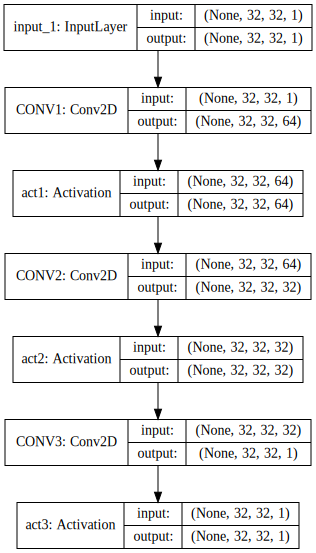

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
def modcrop(image, scale=2): #BY DEFAULT SCALE 2
    if len(image.shape) == 3:
        h, w, _ = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w, :]
    else:
        h, w = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w]
    return image

In [0]:
def create_LR(image,scale):
    label_ = modcrop(image, scale)
    label_ = label_ / 255.
    input_ = scipy.ndimage.interpolation.zoom(label_, (1./scale), prefilter=False)
    input_ = scipy.ndimage.interpolation.zoom(input_, (scale/1.), prefilter=False)
    return input_

In [0]:
path = 'yang91/'
files_y = glob.glob(path + '*.*')
trainfiles = files_y[:60]             #HERE TOTAL IMAGES ARE 91 , SO FROM 91 up to 85 used for Training
valfiles = files_y[60:]               #HERE Above 85 used for Validation Set
img_size = 32
stride = 16
X_train = []
Y_train = []
X_val = []
Y_val = []

In [0]:
# Extract patch image for training
for file_y in trainfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2) #############################################################SCALE###########
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,y:y+img_size].reshape(img_size,img_size,1)
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
            X_train.append(sub_input)
            Y_train.append(sub_label)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [0]:
# Extract patch image for validation
for file_y in valfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2)###########################################################SCALE################
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,  y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            X_val.append(sub_input)
            Y_val.append(sub_label)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [0]:
LEARN_RATE = 1.0e-4

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD

In [0]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename

                             monitor='val_loss', # quantity to monitor

                             verbose=0, # verbosity - 0 or 1

                             save_best_only= True, # The latest best model will not be overwritten

                             mode='auto') # The decision to overwrite model is made 

                                          # automatically depending on the quantity to monitor



In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
model.compile(loss='mse', # Better loss function for neural networks
              optimizer=Adam(lr=LEARN_RATE), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [0]:
model_details = model.fit(X_train, Y_train,
                    batch_size = 128,
                    epochs = 2000, # number of iterations
                    validation_data= (X_val, Y_val),
                    callbacks=[monitor],
                    verbose=2)

W1006 07:12:33.113236 139734286436224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1006 07:12:33.208053 139734286436224 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 14395 samples, validate on 669 samples
Epoch 1/2000
 - 8s - loss: 16477.5749 - acc: 3.5874e-04 - val_loss: 15006.8518 - val_acc: 2.1604e-04
Epoch 2/2000
 - 2s - loss: 11991.3438 - acc: 1.4457e-04 - val_loss: 7438.7882 - val_acc: 4.3792e-06
Epoch 3/2000
 - 2s - loss: 3879.6567 - acc: 1.6913e-04 - val_loss: 1787.9211 - val_acc: 2.9195e-06
Epoch 4/2000
 - 2s - loss: 1540.5931 - acc: 2.9863e-04 - val_loss: 1570.2572 - val_acc: 0.0000e+00
Epoch 5/2000
 - 2s - loss: 1492.0347 - acc: 2.6315e-04 - val_loss: 1552.5408 - val_acc: 0.0000e+00
Epoch 6/2000
 - 2s - loss: 1464.3118 - acc: 2.6370e-04 - val_loss: 1516.3525 - val_acc: 0.0000e+00
Epoch 7/2000
 - 2s - loss: 1418.8637 - acc: 2.6573e-04 - val_loss: 1463.7622 - val_acc: 0.0000e+00
Epoch 8/2000
 - 2s - loss: 1358.0461 - acc: 2.7089e-04 - val_loss: 1395.7302 - val_acc: 0.0000e+00
Epoch 9/2000
 - 2s - loss: 1282.5858 - acc: 2.7163e-04 - val_loss: 1315.3798 - val_acc: 7.2987e-06
Epoch 10/2000
 - 2s - loss: 1196.3467 - acc: 2.7313e-04 - 

In [0]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 0.02%


In [0]:
model.save('wscale2.h5')

In [0]:
img_o = scipy.misc.imread('baby_x2_GT.png',flatten=True,mode='YCbCr').astype(np.float)
img = create_LR(img_o,2) #################################################################SCALE#################
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
        piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)
srcnn = load_model('wscale2.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i = 0
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
        i += 1
cv2.imwrite('restored1.bmp', img_re)
cv2.imwrite('HR1.bmp', img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('blurred1.bmp',img_save)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


True

In [0]:
#CALCULATE PSNR
original = cv2.imread("HR1.bmp")
LR       = cv2.imread("blurred1.bmp")
contrast = cv2.imread("restored1.bmp",1)
def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    if mse ==0:
        return 100
    PIXEL_MAX = 255.0
    return 20* math.log10(PIXEL_MAX / math.sqrt(mse))
d = psnr(original,contrast)
print(d)

37.2052953055


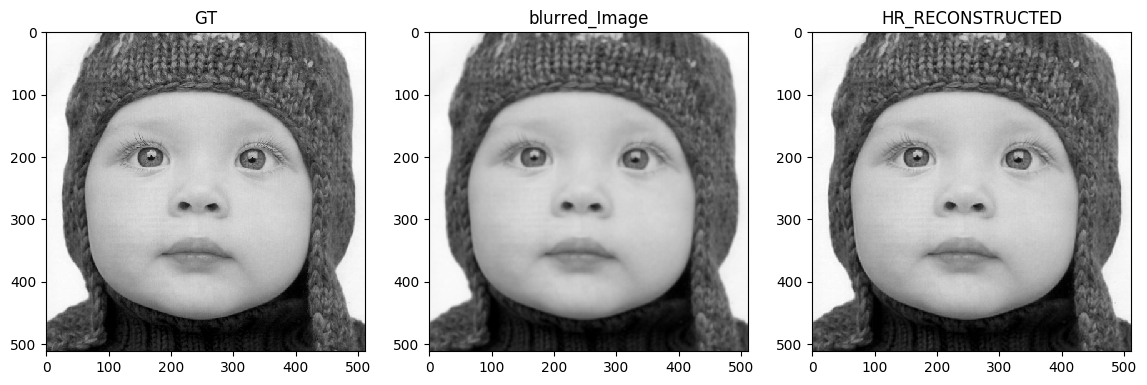

In [0]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = plt.subplot("131")
ax.imshow(original)
ax.set_title("GT")
plt.grid(0)

ax = plt.subplot("132")
ax.imshow(LR)
ax.set_title("blurred_Image")
plt.grid(0)

ax = plt.subplot("133")
ax.imshow(contrast)
ax.set_title("HR_RECONSTRUCTED")
plt.grid(0)
plt.show()